# Analiza skupień

In [1]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

In [2]:
from matplotlib import pyplot as plt

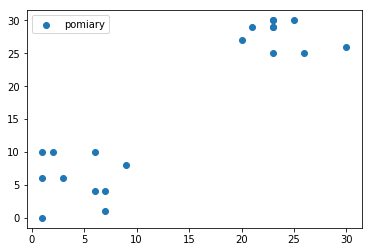

In [3]:
plt.scatter(x,y, label = 'pomiary')
plt.legend()
plt.show()

Mamy tutaj dwa klastry, dwie grupy skupień. Jest to tzn. naturalne skupienie. Czasem dane trzeba ustandaryzować (jeśli nie ma naturalnego skupienia).

Centrum skupienia (centroidy). Co uznajemy za centrum klastra? Odp. średnią (zazwyczaj)

In [4]:
# uczenie nadzorowane
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd

In [5]:
temp = {'x' : x, 'y' : y} #słownik
df = pd.DataFrame(temp)
df.head()

x   y
0  9   8
1  6   4
2  2  10
3  3   6
4  1   0

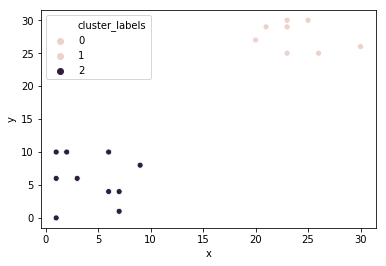

In [6]:
# chcemy policzyc średnie odległości miedzy punktamii sprawdzić ktore należą do którego klastra, bedziemy liczyć kwadraty
#  odległosci -> ward, Z = policzone różnice
Z = linkage(df, method='ward')
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')  # policzone roznice, 2 klastry, kryteria max

import seaborn as sns #lepszy bo kolorki sie same robia
sns.scatterplot(x = 'x', y = 'y', data=df, hue='cluster_labels')
plt.show()

## Dokumentacja dla metod linkage, flucster

```python
from scipy.cluster.hierarchical import linkage

linkage(observation, method="single", metric="euclidean", optimal_ordering=False)

observation -> musi być nd.array albo dataframe
method -> algorytm używany do policzenia bliskości elementów w klastrze
metric -> odległość między elementami
optimal_ordering -> czy ma być zachowana jakaś kolejność, domyślnie nie

METODY:
    single -> metoda oparta o 2 najbliższe elementy
    complete -> 2 najdajsze elementy
    average -> średnia arytmetyczna wszystkich elementów
    centroid -> średnia geometryczna wszystkich elementow
    median -> mediana na wszystkich elementach
    ward -> suma pierwiastków z odległości

```


```python
from scipy.cluster.hierarchical import fcluster

fcluster(distance_matrix, num_clusters, criterion="inconsistent")

distance_matrix -> wynik działania funkcji linkage (return z linkage() )
num_clasters -> liczba klastrów, czyli liczba grup
criterion -> jaki próg wyznaczyć do formowania klastrów (grup)

```

## kmeans - druga metoda analizy skupień

Analiza skupień za pomocą k-średnich

In [7]:
from scipy.cluster.vq import kmeans, vq

In [8]:
# najpierw nasze pomiary chcemy zamienić na floaty
df_f = df[['x', 'y']].values.astype('float')
df_f

array([[ 9.,  8.],
       [ 6.,  4.],
       [ 2., 10.],
       [ 3.,  6.],
       [ 1.,  0.],
       [ 7.,  4.],
       [ 1., 10.],
       [ 6., 10.],
       [ 1.,  6.],
       [ 7.,  1.],
       [23., 29.],
       [26., 25.],
       [25., 30.],
       [23., 29.],
       [21., 29.],
       [23., 30.],
       [23., 25.],
       [20., 27.],
       [30., 26.],
       [23., 30.]])

In [9]:
# chcemy wyliczyć centroidy, u nas dwa, podkreślnikiem oznaczamy tzw dummy_name, zmiene które nie są nam potrzebne
centroids, _ = kmeans(df_f, 2)      #tutaj 2 centra klastrów, ale można ustawić ile chcemy
df.head()

x   y  cluster_labels
0  9   8               2
1  6   4               2
2  2  10               2
3  3   6               2
4  1   0               2

In [10]:
# to jest stary df, chcemy usunąć cluster_labels, bo bedziemy wyliczac jeszcze raz za pomocą kmeans
df.drop('cluster_labels', axis=1, inplace=True)
df.head()

x   y
0  9   8
1  6   4
2  2  10
3  3   6
4  1   0

In [11]:
# funkcja vq posłuży nam do połączenia danych z df oraz df_f *kmeans działa tylko na floatach dlatego konieczna była zamiana)
df['cluster_labels'], _ = vq(df_f, centroids)
df.head()

x   y  cluster_labels
0  9   8               0
1  6   4               0
2  2  10               0
3  3   6               0
4  1   0               0

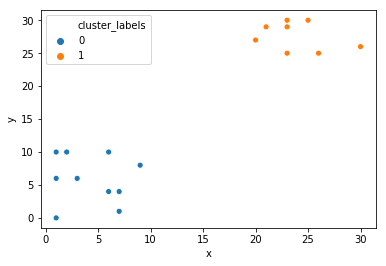

In [12]:
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)

```python
kmeans(standardized_observations, num_cluters, iter = 20, tresh=1e-05, check_finite=True)

return cluster_centers, distortion
       
obserwacje już tylko ustandaryzowane, 
liczba klastrów, 
iter domyślnie 20
check_finit -> sprawdza czy wynikiem są liczby sko ńczone (wymierne), domyślnie True
```

```python
vq(standardized_observation, code_book, check_finite=True
   
return list_of_cluster_labels, list_of_distortions
   
obserwacje również tylko ustandaryzowane
code_book -> książka kodów, czyli centra klastrów
czy wynikiem liczby skończone
   
funkcja zwraca tuplę, którą potem rozpakowywaliśmy
```

In [13]:
goals_for = [4,3,2,3,1,1,2,0,1,4]

In [14]:
# chcemy wystandaryzowac (zwhitenować) dane -> funkcja whiten
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]
scaled_data = whiten(goals_for)
scaled_data

array([3.07692308, 2.30769231, 1.53846154, 2.30769231, 0.76923077,
       0.76923077, 1.53846154, 0.        , 0.76923077, 3.07692308])

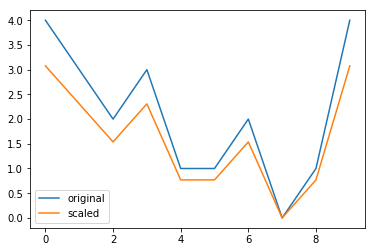

In [15]:
plt.plot(goals_for, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()
plt.show()
# znikaja maxymalne odchylenia, chcemy bardziej wyplaszczyc dane i wykres 

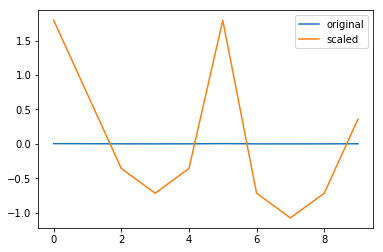

In [16]:
# przypadek gdy dane są bardzo małe
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

scaled_data = whiten(rate_cuts)

plt.plot(rate_cuts, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()
plt.show()


In [17]:
data = pd.read_csv('fifa_18_sample_data.csv')
data.head()

ID               name                     full_name  \
0   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
1  158023           L. Messi                  Lionel Messi   
2  190871             Neymar    Neymar da Silva Santos Jr.   
3  176580          L. Suárez                   Luis Suárez   
4  167495           M. Neuer                  Manuel Neuer   

                  club                                club_logo  special  age  \
0       Real Madrid CF  https://cdn.sofifa.org/18/teams/243.png     2228   32   
1         FC Barcelona  https://cdn.sofifa.org/18/teams/241.png     2158   30   
2  Paris Saint-Germain   https://cdn.sofifa.org/18/teams/73.png     2100   25   
3         FC Barcelona  https://cdn.sofifa.org/18/teams/241.png     2291   30   
4     FC Bayern Munich   https://cdn.sofifa.org/18/teams/21.png     1493   31   

                     league  birth_date  height_cm     ...      prefers_cb  \
0  Spanish Primera División  1985-02-05      185.0     ...           False   
1  Spanish Primera División  1987-06-24      170.0     ...           False   
2            French Ligue 1  1992-02-05      175.0     ...           False   
3  Spanish Primera División  1987-01-24      182.0     ...           False   
4         German Bundesliga  1986-03-27      193.0     ...           False   

  prefers_lb  prefers_lwb prefers_ls prefers_lf prefers_lam  prefers_lcm  \
0      False        False      False      False       False        False   
1      False        False      False      False       False        False   
2      False        False      False      False       False        False   
3      False        False      False      False       False        False   
4      False        False      False      False       False        False   

   prefers_ldm  prefers_lcb  prefers_gk  
0        False        False       False  
1        False        False       False  
2        False        False       False  
3        False        False       False  
4        False        False        True  

[5 rows x 185 columns]

In [18]:
!ls -al
# dla windows !dir - sprawdzenie jakie pliki znajduja sie w lokalizacji w ktorej jestem

total 5636
drwxr-xr-x  6 kodolamacz kodolamacz    4096 mar  2 22:33 .
drwxr-xr-x 12 kodolamacz kodolamacz    4096 lut 17 00:07 ..
-rw-r--r--  1 kodolamacz kodolamacz  866786 mar  2 22:33 analiza_skupien_dendrogram.ipynb
drwxr-xr-x  2 kodolamacz kodolamacz    4096 mar  2 09:07 Dane
-rw-r--r--  1 kodolamacz kodolamacz  107925 mar  2 22:33 fifa_18_dataset.csv
-rw-r--r--  1 kodolamacz kodolamacz 1084747 mar  2 22:33 fifa_18_sample_data.csv
drwxr-xr-x  2 kodolamacz kodolamacz    4096 lut 16 23:30 Grafika
-rw-r--r--  1 kodolamacz kodolamacz  399845 lut 16 23:30 Grafika.tar.gz
drwxr-xr-x  2 kodolamacz kodolamacz    4096 mar  2 22:33 .ipynb_checkpoints
-rw-r--r--  1 kodolamacz kodolamacz  420218 mar  2 09:07 ML1_materialy_z_zajec.ipynb
-rw-r--r--  1 kodolamacz kodolamacz  127107 mar  2 09:07 ML2_materialy_z_zajec.ipynb
-rw-r--r--  1 kodolamacz kodolamacz 2471420 mar  2 22:33 movies_plot.csv
-rw-r--r--  1 kodolamacz kodolamacz  200829 mar  2 22:33 plaza.jpg
drwxr-xr-x  3 kodolamacz kodolamacz  

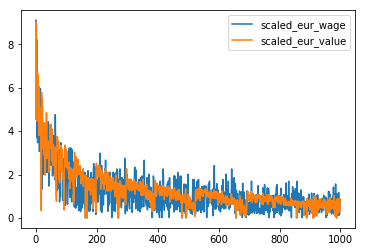

In [19]:
# chcemy znalezc zależnosc miedzy wtygodniowką (wage) a wartoscia zawodnika - EUR_WAGE, EUR_VALUE
eur_wage = data['eur_wage']
eur_value = data['eur_value']

scaled_eur_wage = whiten(eur_wage)
scaled_eur_value = whiten(eur_value)

plt.plot(scaled_eur_wage, label='scaled_eur_wage')
plt.plot(scaled_eur_value, label='scaled_eur_value')
plt.legend()
plt.show()


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


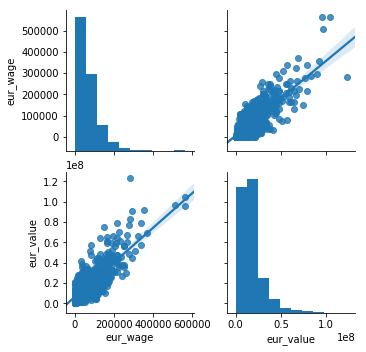

In [20]:
sns.pairplot(data=data, vars=["eur_wage", "eur_value"], kind="reg")  # tutaj bez standaryzacji
plt.show()

In [21]:
x = """
0     17
1     20
2     35
3     14
4     37
5     33
6     14
7     30
8     35
9     17
10    11
11    21
12    13
13    10
14    81
15    84
16    87
17    83
18    90
19    97
20    94
21    88
22    89
23    93
24    92
25    82
26    81
27    92
28    91
29    22
30    23
31    25
32    25
33    27
34    17
35    17
"""


y = """
0       4
1       6
2       0
3       0
4       4
5       3
6       1
7       6
8       5
9       4
10      6
11     10
12      8
13     10
14     97
15     94
16     99
17     95
18     95
19     97
20     99
21     99
22     94
23     99
24     90
25     98
26    100
27     93
28     98
29     15
30     10
31      0
32     10
33      7
34     17
35     15
"""

In [22]:
from io import StringIO

df_coordinates_x = pd.read_csv(StringIO(x), sep='\s+', engine='python', index_col=0, names=['x_coordinate'], header=None)
df_coordinates_y = pd.read_csv(StringIO(y), sep='\s+', engine='python', index_col=0, names=['y_coordinate'], header=None)



In [23]:
comic_con = df_coordinates_x.join(df_coordinates_y)
comic_con.head()

x_coordinate  y_coordinate
0            17             4
1            20             6
2            35             0
3            14             0
4            37             4

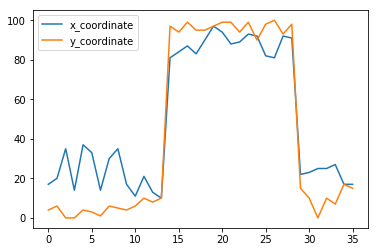

In [24]:
comic_con.plot()

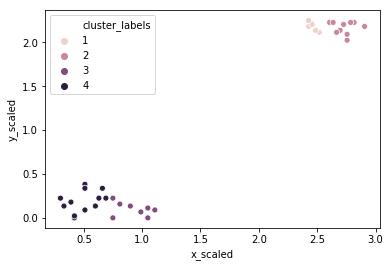

In [25]:
# gdzie postawic stoisko by przyszlo najwiecej ludzi - badamy klastry, najlepsze stoiska skupione

comic_con['x_scaled'] = whiten(comic_con['x_coordinate']) 
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric='euclidean')

comic_con['cluster_labels'] =fcluster(distance_matrix, 4, criterion="maxclust")

sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)

Czarny klaster - wiecej stoisk, ale bardziej rozproszone, różowe - mniej stoisk ale bardziej skupionych (więcej ludzi w jednym miejscu)

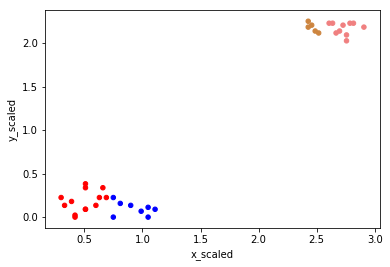

In [26]:
# chcemy ładniejsze kolory, css colors - podejrzec w przegladarce, parametr c do kolorów, 1 i 2 są kluczami w klastrze
colors = {1 : 'peru', 2: 'lightcoral', 3: 'blue', 4: 'red'}
comic_con.plot.scatter(x = 'x_scaled', y = 'y_scaled', c=comic_con['cluster_labels'].apply(lambda x: colors[x]))

# Dendrogram

In [27]:
from scipy.cluster.hierarchy import dendrogram

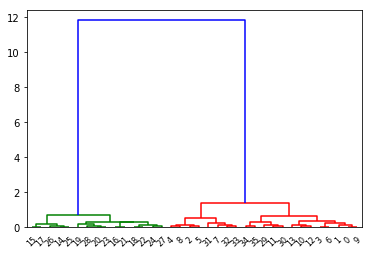

In [28]:
dn = dendrogram(distance_matrix)
plt.show()

In [29]:
type(distance_matrix)

numpy.ndarray

In [30]:
distance_matrix[0:4]

array([[0.00000000e+00, 9.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 6.00000000e+00, 2.25024613e-02, 2.00000000e+00],
       [1.60000000e+01, 2.10000000e+01, 2.99617089e-02, 2.00000000e+00],
       [2.00000000e+01, 2.30000000e+01, 2.99617089e-02, 2.00000000e+00]])

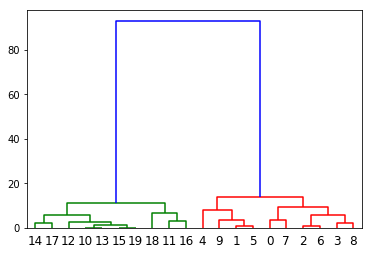

In [31]:
# chcemy obciac troche danych, można wykorzystac Z
dn = dendrogram(Z)
plt.show()

Ilość centrów (zmieniliśmy na 4) nie wpływa na prezentację dendrogramów. Zatem nie ma sensu robić 4 bo dla 2 wychodzi podobnie.

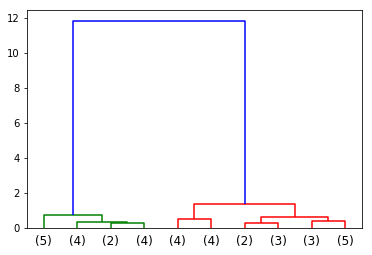

In [32]:
dn = dendrogram(distance_matrix, p=10, truncate_mode='lastp')
plt.show()

In [33]:
# ślizg i agresja z pliku fifa18.csv
data["scaled_sliding_tackle"] = whiten(data["sliding_tackle"])
data["scaled_aggression"] = whiten(data["aggression"])
distance_matrix = linkage(data[["scaled_sliding_tackle", "scaled_aggression"]][:20], 'ward')

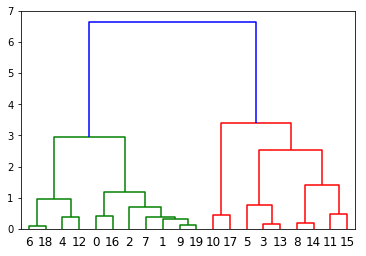

In [34]:
dn2 = dendrogram(distance_matrix)

In [35]:
# ziarno losowości - chcemy mieć zawsze te same dane losowe
from numpy import random
random.seed(6)

In [36]:
cluster_centers, _ = kmeans(comic_con[["x_scaled", "y_scaled"]], 2)
# musimy policzyc dodatkową kolumnę claster_labels ale mamy ją juz wyżej, wiec nazwiemy jako cl_2 - claster_labels_2 
# x i y są juz przeskalowane do float, gdyby nie było to trzeba najpierw zamienic na float

comic_con['cl_2'], _ = vq(comic_con[["x_scaled", "y_scaled"]], cluster_centers)

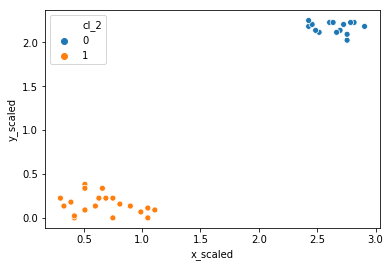

In [37]:
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cl_2', data = comic_con)

Różnica byłaby widoczna dopiero przy większej ilości danych, np. kilkaset, kilka tysięcy danych

# Użycie google analitycs - heatmapa dla poruszania myszką przez użytkownika - CLICKSTREM

In [38]:
mouse = [{"x":1068,"y":129},{"x":1044,"y":131},{"x":1022,"y":133},{"x":941,"y":175},{"x":894,"y":207},{"x":856,"y":231},{"x":845,"y":236},{"x":821,"y":249},{"x":762,"y":285},{"x":748,"y":295},{"x":712,"y":321},{"x":678,"y":346},{"x":656,"y":366},{"x":637,"y":384},{"x":619,"y":409},{"x":612,"y":417},{"x":603,"y":437},{"x":595,"y":465},{"x":592,"y":480},{"x":592,"y":494},{"x":591,"y":507},{"x":597,"y":527},{"x":601,"y":535},{"x":625,"y":559},{"x":634,"y":566},{"x":652,"y":572},{"x":677,"y":573},{"x":705,"y":561},{"x":725,"y":551},{"x":752,"y":533},{"x":758,"y":528},{"x":769,"y":517},{"x":778,"y":503},{"x":786,"y":489},{"x":792,"y":472},{"x":794,"y":456},{"x":795,"y":429},{"x":792,"y":398},{"x":789,"y":388},{"x":781,"y":370},{"x":771,"y":354},{"x":759,"y":341},{"x":742,"y":329},{"x":654,"y":291},{"x":626,"y":281},{"x":596,"y":276},{"x":588,"y":276},{"x":572,"y":279},{"x":550,"y":288},{"x":544,"y":291},{"x":532,"y":301},{"x":521,"y":314},{"x":513,"y":329},{"x":504,"y":346},{"x":490,"y":366},{"x":478,"y":386},{"x":470,"y":405},{"x":463,"y":429},{"x":462,"y":435},{"x":459,"y":449},{"x":456,"y":482},{"x":455,"y":488},{"x":454,"y":496},{"x":453,"y":513},{"x":453,"y":518},{"x":458,"y":537},{"x":465,"y":549},{"x":486,"y":571},{"x":495,"y":578},{"x":529,"y":593},{"x":553,"y":599},{"x":563,"y":600},{"x":595,"y":601},{"x":629,"y":603},{"x":662,"y":605},{"x":674,"y":605},{"x":693,"y":602},{"x":707,"y":597},{"x":714,"y":596},{"x":733,"y":592},{"x":735,"y":592},{"x":739,"y":592},{"x":745,"y":592},{"x":756,"y":596},{"x":773,"y":619},{"x":776,"y":627},{"x":781,"y":638},{"x":784,"y":652},{"x":785,"y":664},{"x":783,"y":681},{"x":780,"y":691},{"x":776,"y":699},{"x":757,"y":711},{"x":745,"y":711},{"x":726,"y":710},{"x":707,"y":707},{"x":678,"y":699},{"x":665,"y":695},{"x":643,"y":690},{"x":605,"y":677},{"x":594,"y":673},{"x":564,"y":651},{"x":560,"y":644},{"x":553,"y":627},{"x":543,"y":593},{"x":541,"y":582},{"x":536,"y":548},{"x":536,"y":535},{"x":557,"y":459},{"x":568,"y":422},{"x":581,"y":393},{"x":597,"y":366},{"x":606,"y":356},{"x":625,"y":335},{"x":651,"y":316},{"x":695,"y":292},{"x":714,"y":287},{"x":742,"y":282},{"x":767,"y":278},{"x":815,"y":273},{"x":841,"y":270},{"x":862,"y":264},{"x":883,"y":253},{"x":888,"y":248},{"x":897,"y":233},{"x":900,"y":206},{"x":898,"y":177},{"x":878,"y":132},{"x":663,"y":30},{"x":578,"y":14},{"x":520,"y":14},{"x":493,"y":18},{"x":465,"y":25},{"x":445,"y":30},{"x":421,"y":42},{"x":418,"y":44},{"x":405,"y":56},{"x":388,"y":76},{"x":375,"y":103},{"x":362,"y":137},{"x":353,"y":162},{"x":343,"y":190},{"x":323,"y":248},{"x":303,"y":337},{"x":288,"y":382},{"x":283,"y":399},{"x":281,"y":413},{"x":281,"y":425},{"x":280,"y":441},{"x":278,"y":453},{"x":277,"y":464},{"x":277,"y":476},{"x":380,"y":550},{"x":406,"y":559},{"x":447,"y":576},{"x":459,"y":579},{"x":484,"y":584},{"x":509,"y":594},{"x":517,"y":600},{"x":523,"y":607},{"x":528,"y":617},{"x":531,"y":628},{"x":535,"y":645},{"x":536,"y":656},{"x":537,"y":662},{"x":538,"y":680},{"x":540,"y":695},{"x":543,"y":701},{"x":550,"y":712},{"x":571,"y":726},{"x":580,"y":729},{"x":600,"y":736},{"x":633,"y":737},{"x":654,"y":729},{"x":673,"y":720},{"x":690,"y":709},{"x":698,"y":699},{"x":692,"y":661},{"x":686,"y":653},{"x":677,"y":647},{"x":651,"y":630},{"x":610,"y":620},{"x":552,"y":616},{"x":429,"y":624},{"x":404,"y":630},{"x":385,"y":632},{"x":342,"y":632},{"x":336,"y":632},{"x":331,"y":630},{"x":323,"y":620},{"x":321,"y":604},{"x":321,"y":580},{"x":338,"y":513},{"x":357,"y":470},{"x":412,"y":404},{"x":441,"y":386},{"x":477,"y":377},{"x":482,"y":381},{"x":488,"y":394},{"x":496,"y":410},{"x":504,"y":430},{"x":521,"y":451},{"x":540,"y":467},{"x":569,"y":479},{"x":577,"y":480},{"x":601,"y":477},{"x":620,"y":462},{"x":625,"y":453},{"x":633,"y":426},{"x":635,"y":403},{"x":636,"y":392},{"x":632,"y":343},{"x":618,"y":325},{"x":608,"y":318},{"x":598,"y":310},{"x":568,"y":289},{"x":551,"y":277},{"x":538,"y":265},{"x":537,"y":262},{"x":538,"y":240},{"x":542,"y":229},{"x":562,"y":208},{"x":584,"y":188},{"x":642,"y":150},{"x":659,"y":142},{"x":784,"y":322},{"x":817,"y":326},{"x":833,"y":251},{"x":811,"y":231},{"x":753,"y":212},{"x":718,"y":214},{"x":667,"y":235},{"x":496,"y":378},{"x":467,"y":419},{"x":416,"y":546},{"x":401,"y":603},{"x":407,"y":697},{"x":436,"y":721},{"x":471,"y":728},{"x":534,"y":727},{"x":561,"y":717},{"x":587,"y":698},{"x":594,"y":688},{"x":585,"y":603},{"x":572,"y":595},{"x":555,"y":589},{"x":474,"y":575},{"x":449,"y":574},{"x":427,"y":574},{"x":394,"y":576},{"x":370,"y":590},{"x":341,"y":648},{"x":338,"y":660},{"x":342,"y":682},{"x":354,"y":700},{"x":415,"y":738},{"x":457,"y":754},{"x":520,"y":764},{"x":534,"y":765},{"x":558,"y":766},{"x":571,"y":765},{"x":577,"y":761},{"x":598,"y":731},{"x":606,"y":718},{"x":616,"y":704},{"x":630,"y":681},{"x":637,"y":664},{"x":640,"y":657},{"x":646,"y":641},{"x":647,"y":632},{"x":647,"y":631},{"x":647,"y":630},{"x":657,"y":630},{"x":667,"y":631},{"x":677,"y":631},{"x":715,"y":631},{"x":741,"y":630},{"x":782,"y":632},{"x":799,"y":635},{"x":804,"y":636},{"x":805,"y":637},{"x":804,"y":637},{"x":803,"y":637},{"x":802,"y":637},{"x":800,"y":636},{"x":800,"y":635},{"x":799,"y":634},{"x":799,"y":633},{"x":799,"y":631},{"x":799,"y":630},{"x":800,"y":629},{"x":801,"y":628},{"x":803,"y":627},{"x":805,"y":625},{"x":806,"y":624},{"x":810,"y":622},{"x":811,"y":621},{"x":812,"y":621},{"x":812,"y":620},{"x":813,"y":619},{"x":815,"y":616},{"x":824,"y":609},{"x":857,"y":593},{"x":875,"y":586},{"x":894,"y":580},{"x":940,"y":570},{"x":1017,"y":556},{"x":1047,"y":330},{"x":954,"y":335},{"x":859,"y":334},{"x":735,"y":333},{"x":717,"y":331},{"x":716,"y":331},{"x":715,"y":331},{"x":715,"y":330},{"x":714,"y":329},{"x":714,"y":328},{"x":714,"y":325},{"x":716,"y":321},{"x":719,"y":316},{"x":721,"y":313},{"x":728,"y":304},{"x":731,"y":299},{"x":733,"y":297},{"x":740,"y":290},{"x":747,"y":285},{"x":755,"y":280},{"x":767,"y":274},{"x":776,"y":269},{"x":788,"y":266},{"x":792,"y":264},{"x":832,"y":258},{"x":837,"y":258},{"x":845,"y":256},{"x":850,"y":256},{"x":851,"y":256},{"x":852,"y":257},{"x":854,"y":259},{"x":854,"y":262},{"x":857,"y":266},{"x":862,"y":272},{"x":882,"y":288},{"x":890,"y":293},{"x":928,"y":304},{"x":949,"y":308},{"x":1052,"y":318},{"x":3,"y":484},{"x":151,"y":499},{"x":248,"y":498},{"x":412,"y":503},{"x":553,"y":502},{"x":682,"y":497},{"x":723,"y":495},{"x":799,"y":495},{"x":845,"y":491},{"x":863,"y":489},{"x":877,"y":487},{"x":885,"y":486},{"x":890,"y":484},{"x":903,"y":481},{"x":919,"y":479},{"x":929,"y":479},{"x":939,"y":477},{"x":946,"y":475},{"x":955,"y":474},{"x":957,"y":473},{"x":959,"y":473},{"x":961,"y":471},{"x":964,"y":470},{"x":972,"y":468},{"x":984,"y":464},{"x":1006,"y":459},{"x":1059,"y":454},{"x":1029,"y":183},{"x":932,"y":156},{"x":679,"y":105},{"x":527,"y":84},{"x":418,"y":78},{"x":317,"y":158},{"x":303,"y":189},{"x":266,"y":309},{"x":261,"y":346},{"x":252,"y":481},{"x":242,"y":569},{"x":226,"y":679},{"x":221,"y":726},{"x":221,"y":740},{"x":222,"y":743},{"x":225,"y":750},{"x":227,"y":754},{"x":228,"y":758},{"x":231,"y":762},{"x":236,"y":769},{"x":239,"y":773},{"x":242,"y":776},{"x":245,"y":778},{"x":247,"y":780},{"x":247,"y":778},{"x":235,"y":755},{"x":204,"y":704},{"x":163,"y":640},{"x":6,"y":475},{"x":3,"y":473},{"x":132,"y":449},{"x":186,"y":437},{"x":399,"y":403},{"x":970,"y":314},{"x":1044,"y":308},{"x":1040,"y":284},{"x":961,"y":295},{"x":724,"y":309},{"x":706,"y":306},{"x":667,"y":291},{"x":660,"y":287},{"x":652,"y":284},{"x":637,"y":275},{"x":616,"y":265},{"x":604,"y":261},{"x":602,"y":259},{"x":597,"y":256},{"x":588,"y":249},{"x":582,"y":246},{"x":579,"y":246},{"x":570,"y":245},{"x":565,"y":245},{"x":556,"y":247},{"x":523,"y":292},{"x":509,"y":372},{"x":519,"y":408},{"x":523,"y":432},{"x":543,"y":512},{"x":566,"y":549},{"x":620,"y":583},{"x":642,"y":589},{"x":720,"y":574},{"x":721,"y":571},{"x":722,"y":565},{"x":723,"y":558},{"x":723,"y":556},{"x":724,"y":552},{"x":724,"y":547},{"x":724,"y":541},{"x":724,"y":534},{"x":728,"y":521},{"x":731,"y":514},{"x":737,"y":500},{"x":738,"y":493},{"x":739,"y":480},{"x":741,"y":470},{"x":743,"y":459},{"x":753,"y":434},{"x":767,"y":416},{"x":771,"y":411},{"x":776,"y":405},{"x":789,"y":393},{"x":804,"y":382},{"x":822,"y":370},{"x":844,"y":358},{"x":848,"y":357},{"x":859,"y":356},{"x":871,"y":366},{"x":879,"y":378},{"x":885,"y":395},{"x":849,"y":531},{"x":804,"y":559},{"x":780,"y":569},{"x":728,"y":583},{"x":687,"y":585},{"x":643,"y":582},{"x":591,"y":576},{"x":527,"y":548},{"x":503,"y":529},{"x":491,"y":510},{"x":487,"y":500},{"x":484,"y":479},{"x":484,"y":455},{"x":485,"y":426},{"x":488,"y":410},{"x":491,"y":402},{"x":503,"y":377},{"x":514,"y":364},{"x":528,"y":352},{"x":561,"y":326},{"x":567,"y":322},{"x":596,"y":309},{"x":602,"y":308},{"x":611,"y":310},{"x":619,"y":313},{"x":627,"y":318},{"x":634,"y":325},{"x":644,"y":335},{"x":659,"y":360},{"x":672,"y":379},{"x":679,"y":396},{"x":687,"y":410},{"x":692,"y":422},{"x":701,"y":440},{"x":707,"y":453},{"x":713,"y":464},{"x":719,"y":475},{"x":724,"y":482},{"x":730,"y":487},{"x":734,"y":491},{"x":738,"y":495},{"x":747,"y":500},{"x":761,"y":507},{"x":769,"y":514},{"x":771,"y":515},{"x":776,"y":517},{"x":777,"y":519},{"x":777,"y":520},{"x":777,"y":521},{"x":777,"y":522},{"x":777,"y":523},{"x":768,"y":524},{"x":766,"y":524},{"x":753,"y":515},{"x":747,"y":510},{"x":724,"y":495},{"x":719,"y":491},{"x":708,"y":483},{"x":689,"y":463},{"x":673,"y":446},{"x":668,"y":440},{"x":665,"y":436},{"x":663,"y":433},{"x":663,"y":432},{"x":663,"y":431},{"x":663,"y":430},{"x":665,"y":429},{"x":669,"y":423},{"x":670,"y":421},{"x":672,"y":419},{"x":675,"y":413},{"x":683,"y":402},{"x":694,"y":389},{"x":697,"y":386},{"x":700,"y":381},{"x":701,"y":380},{"x":701,"y":378},{"x":701,"y":377},{"x":700,"y":376},{"x":699,"y":376},{"x":698,"y":376},{"x":697,"y":376},{"x":696,"y":376},{"x":694,"y":375},{"x":686,"y":374},{"x":683,"y":374},{"x":678,"y":373},{"x":676,"y":372},{"x":666,"y":370},{"x":659,"y":369},{"x":654,"y":367},{"x":651,"y":366},{"x":650,"y":366},{"x":654,"y":366},{"x":676,"y":367},{"x":743,"y":370},{"x":774,"y":374},{"x":858,"y":381},{"x":908,"y":390},{"x":1053,"y":424},{"x":1059,"y":281},{"x":980,"y":270},{"x":723,"y":267},{"x":683,"y":274},{"x":560,"y":293},{"x":543,"y":294},{"x":517,"y":298},{"x":497,"y":303},{"x":482,"y":309},{"x":467,"y":318},{"x":435,"y":341},{"x":416,"y":363},{"x":407,"y":380},{"x":403,"y":386},{"x":402,"y":387},{"x":397,"y":387},{"x":392,"y":385},{"x":396,"y":369},{"x":399,"y":356},{"x":403,"y":342},{"x":388,"y":332},{"x":374,"y":325},{"x":350,"y":309},{"x":319,"y":293},{"x":281,"y":277},{"x":261,"y":268},{"x":222,"y":246},{"x":194,"y":227},{"x":186,"y":218},{"x":177,"y":208},{"x":173,"y":205},{"x":169,"y":203},{"x":168,"y":203},{"x":167,"y":203},{"x":173,"y":200},{"x":185,"y":198},{"x":261,"y":192},{"x":368,"y":189},{"x":467,"y":194},{"x":703,"y":206},{"x":1020,"y":208},{"x":1056,"y":208},{"x":1054,"y":428},{"x":1054,"y":428},{"x":928,"y":414},{"x":724,"y":390},{"x":683,"y":387},{"x":601,"y":372},{"x":514,"y":359},{"x":461,"y":358},{"x":453,"y":358},{"x":445,"y":358},{"x":442,"y":358},{"x":444,"y":358},{"x":450,"y":353},{"x":470,"y":335},{"x":499,"y":311},{"x":547,"y":268},{"x":566,"y":249},{"x":588,"y":224},{"x":591,"y":220},{"x":597,"y":211},{"x":603,"y":201},{"x":606,"y":194},{"x":608,"y":189},{"x":611,"y":187},{"x":612,"y":186},{"x":614,"y":186},{"x":621,"y":187},{"x":631,"y":194},{"x":646,"y":208},{"x":722,"y":292},{"x":771,"y":370},{"x":795,"y":410},{"x":807,"y":424},{"x":835,"y":457},{"x":868,"y":494},{"x":875,"y":500},{"x":891,"y":512},{"x":898,"y":516},{"x":904,"y":518},{"x":905,"y":518},{"x":906,"y":518},{"x":902,"y":518},{"x":897,"y":517},{"x":891,"y":516},{"x":868,"y":516},{"x":822,"y":519},{"x":801,"y":521},{"x":783,"y":525},{"x":687,"y":531},{"x":639,"y":528},{"x":621,"y":525},{"x":590,"y":513},{"x":575,"y":499},{"x":564,"y":478},{"x":553,"y":453},{"x":543,"y":413},{"x":542,"y":404},{"x":545,"y":369},{"x":547,"y":362},{"x":553,"y":349},{"x":565,"y":332},{"x":568,"y":329},{"x":571,"y":326},{"x":580,"y":318},{"x":585,"y":316},{"x":598,"y":313},{"x":617,"y":311},{"x":641,"y":309},{"x":675,"y":306},{"x":697,"y":306},{"x":733,"y":302},{"x":736,"y":301},{"x":749,"y":299},{"x":754,"y":298},{"x":777,"y":296},{"x":784,"y":296},{"x":800,"y":295},{"x":817,"y":294},{"x":829,"y":293},{"x":930,"y":295},{"x":1070,"y":291},{"x":1058,"y":531},{"x":971,"y":547},{"x":874,"y":573},{"x":822,"y":591},{"x":636,"y":641},{"x":598,"y":651},{"x":535,"y":661},{"x":480,"y":671},{"x":448,"y":673},{"x":417,"y":676},{"x":369,"y":678},{"x":319,"y":680},{"x":273,"y":680},{"x":205,"y":677},{"x":151,"y":661},{"x":90,"y":625},{"x":74,"y":609},{"x":23,"y":531},{"x":5,"y":460},{"x":91,"y":452},{"x":156,"y":450},{"x":324,"y":444},{"x":511,"y":437},{"x":972,"y":386},{"x":1056,"y":382},{"x":873,"y":218},{"x":838,"y":218},{"x":761,"y":216},{"x":720,"y":216},{"x":616,"y":214},{"x":564,"y":214},{"x":524,"y":218},{"x":516,"y":219},{"x":499,"y":221},{"x":483,"y":223},{"x":476,"y":224},{"x":438,"y":228},{"x":434,"y":229},{"x":425,"y":229},{"x":421,"y":229},{"x":416,"y":230},{"x":411,"y":231},{"x":408,"y":234},{"x":407,"y":236},{"x":401,"y":268},{"x":401,"y":278},{"x":401,"y":294},{"x":403,"y":311},{"x":410,"y":338},{"x":415,"y":346},{"x":424,"y":363},{"x":428,"y":372},{"x":446,"y":389},{"x":448,"y":389},{"x":449,"y":389},{"x":455,"y":385},{"x":460,"y":378},{"x":469,"y":371},{"x":482,"y":362},{"x":494,"y":354},{"x":503,"y":348},{"x":511,"y":343},{"x":512,"y":341},{"x":514,"y":339},{"x":516,"y":334},{"x":519,"y":328},{"x":521,"y":325},{"x":522,"y":319},{"x":525,"y":314},{"x":527,"y":306},{"x":530,"y":295},{"x":538,"y":267},{"x":539,"y":258},{"x":540,"y":252},{"x":541,"y":237},{"x":538,"y":213},{"x":532,"y":198},{"x":529,"y":192},{"x":484,"y":157},{"x":455,"y":134},{"x":441,"y":121},{"x":428,"y":93},{"x":427,"y":86},{"x":427,"y":83},{"x":425,"y":76},{"x":417,"y":79},{"x":379,"y":87},{"x":374,"y":88},{"x":360,"y":92},{"x":327,"y":104},{"x":319,"y":108},{"x":266,"y":151},{"x":259,"y":162},{"x":240,"y":204},{"x":231,"y":243},{"x":231,"y":283},{"x":231,"y":336},{"x":237,"y":373},{"x":241,"y":414},{"x":244,"y":435},{"x":245,"y":442},{"x":246,"y":444},{"x":248,"y":444},{"x":253,"y":442},{"x":261,"y":437},{"x":274,"y":429},{"x":296,"y":414},{"x":319,"y":402},{"x":320,"y":401},{"x":322,"y":401},{"x":323,"y":401},{"x":324,"y":401},{"x":325,"y":401},{"x":327,"y":401},{"x":329,"y":399},{"x":334,"y":391},{"x":340,"y":384},{"x":341,"y":377},{"x":345,"y":360},{"x":346,"y":360},{"x":360,"y":354},{"x":361,"y":352},{"x":361,"y":350},{"x":361,"y":348},{"x":363,"y":345},{"x":597,"y":260},{"x":684,"y":242},{"x":693,"y":239},{"x":698,"y":235},{"x":699,"y":235},{"x":705,"y":234},{"x":710,"y":233},{"x":712,"y":233},{"x":713,"y":233},{"x":714,"y":233},{"x":714,"y":234},{"x":712,"y":236},{"x":710,"y":237},{"x":709,"y":237},{"x":708,"y":238},{"x":707,"y":238},{"x":706,"y":239},{"x":690,"y":241},{"x":625,"y":274},{"x":579,"y":296},{"x":558,"y":304},{"x":556,"y":305},{"x":547,"y":308},{"x":528,"y":318},{"x":515,"y":321},{"x":510,"y":322},{"x":351,"y":347},{"x":329,"y":353},{"x":321,"y":356},{"x":312,"y":358},{"x":308,"y":359},{"x":304,"y":361},{"x":303,"y":361},{"x":302,"y":362},{"x":299,"y":364},{"x":297,"y":366},{"x":294,"y":367},{"x":294,"y":368},{"x":293,"y":369},{"x":293,"y":370},{"x":291,"y":370},{"x":288,"y":374},{"x":288,"y":375},{"x":289,"y":375},{"x":290,"y":375},{"x":291,"y":375},{"x":292,"y":375},{"x":294,"y":375},{"x":301,"y":373},{"x":305,"y":372},{"x":306,"y":372},{"x":309,"y":370},{"x":310,"y":368},{"x":312,"y":364},{"x":314,"y":364},{"x":315,"y":362},{"x":317,"y":358},{"x":317,"y":356},{"x":317,"y":354},{"x":320,"y":354},{"x":323,"y":353},{"x":325,"y":352},{"x":333,"y":352},{"x":338,"y":352},{"x":345,"y":356},{"x":353,"y":364},{"x":356,"y":370},{"x":357,"y":376},{"x":358,"y":378},{"x":359,"y":384},{"x":360,"y":391},{"x":362,"y":402},{"x":368,"y":432},{"x":386,"y":480},{"x":391,"y":492},{"x":317,"y":483},{"x":318,"y":463},{"x":319,"y":454},{"x":321,"y":432},{"x":321,"y":420},{"x":319,"y":407},{"x":317,"y":395},{"x":317,"y":373},{"x":317,"y":365},{"x":318,"y":343},{"x":318,"y":334},{"x":318,"y":310},{"x":318,"y":303},{"x":320,"y":284},{"x":322,"y":273},{"x":323,"y":264},{"x":324,"y":258},{"x":326,"y":253},{"x":327,"y":249},{"x":329,"y":244},{"x":331,"y":240},{"x":331,"y":238},{"x":332,"y":237},{"x":333,"y":236},{"x":334,"y":235},{"x":335,"y":234},{"x":336,"y":232},{"x":339,"y":231},{"x":342,"y":230},{"x":356,"y":228},{"x":375,"y":226},{"x":391,"y":226},{"x":403,"y":225},{"x":410,"y":224},{"x":426,"y":227},{"x":436,"y":231},{"x":448,"y":238},{"x":471,"y":259},{"x":475,"y":263},{"x":478,"y":269},{"x":480,"y":275},{"x":480,"y":289},{"x":477,"y":291},{"x":471,"y":293},{"x":450,"y":297},{"x":446,"y":297},{"x":440,"y":297},{"x":430,"y":297},{"x":412,"y":294},{"x":398,"y":289},{"x":380,"y":283},{"x":357,"y":275},{"x":350,"y":273},{"x":348,"y":272},{"x":346,"y":271},{"x":345,"y":272},{"x":344,"y":273},{"x":342,"y":276},{"x":342,"y":277},{"x":340,"y":278},{"x":340,"y":280},{"x":344,"y":277},{"x":350,"y":272},{"x":382,"y":239},{"x":395,"y":227},{"x":399,"y":222},{"x":409,"y":213},{"x":411,"y":211},{"x":412,"y":210},{"x":413,"y":209},{"x":414,"y":209},{"x":415,"y":208},{"x":416,"y":208},{"x":418,"y":208},{"x":419,"y":208},{"x":420,"y":208},{"x":421,"y":209},{"x":425,"y":214},{"x":426,"y":215},{"x":426,"y":216},{"x":427,"y":218},{"x":427,"y":221},{"x":427,"y":222},{"x":427,"y":224},{"x":429,"y":226},{"x":430,"y":226},{"x":439,"y":228},{"x":444,"y":228},{"x":461,"y":228},{"x":516,"y":231},{"x":525,"y":231},{"x":548,"y":229},{"x":554,"y":228},{"x":565,"y":227},{"x":575,"y":226},{"x":579,"y":226},{"x":581,"y":225},{"x":582,"y":225},{"x":583,"y":225},{"x":583,"y":224},{"x":582,"y":223},{"x":580,"y":223},{"x":572,"y":221},{"x":562,"y":216},{"x":550,"y":212},{"x":544,"y":209},{"x":529,"y":202},{"x":525,"y":199},{"x":518,"y":190},{"x":514,"y":173},{"x":513,"y":167},{"x":510,"y":159},{"x":510,"y":157},{"x":509,"y":154},{"x":509,"y":152},{"x":509,"y":151},{"x":509,"y":152},{"x":510,"y":152},{"x":511,"y":151},{"x":764,"y":136},{"x":778,"y":148},{"x":786,"y":189},{"x":786,"y":192},{"x":786,"y":196},{"x":786,"y":198},{"x":784,"y":204},{"x":782,"y":209},{"x":783,"y":234},{"x":786,"y":240},{"x":786,"y":241},{"x":787,"y":242},{"x":787,"y":243},{"x":789,"y":242},{"x":795,"y":238},{"x":795,"y":239},{"x":796,"y":241},{"x":799,"y":241},{"x":800,"y":240},{"x":801,"y":240},{"x":802,"y":243},{"x":803,"y":246},{"x":804,"y":249},{"x":807,"y":270},{"x":812,"y":364},{"x":812,"y":383},{"x":814,"y":428},{"x":815,"y":442},{"x":820,"y":487},{"x":820,"y":503},{"x":818,"y":518},{"x":816,"y":522},{"x":813,"y":524},{"x":784,"y":526},{"x":741,"y":526},{"x":702,"y":530},{"x":679,"y":535},{"x":653,"y":545},{"x":628,"y":581},{"x":624,"y":589},{"x":616,"y":606},{"x":598,"y":628},{"x":561,"y":650},{"x":420,"y":643},{"x":396,"y":633},{"x":353,"y":609},{"x":332,"y":600},{"x":301,"y":587},{"x":283,"y":582},{"x":275,"y":580},{"x":263,"y":578},{"x":252,"y":578},{"x":244,"y":578},{"x":238,"y":581},{"x":231,"y":584},{"x":227,"y":587},{"x":223,"y":592},{"x":222,"y":593},{"x":222,"y":596},{"x":221,"y":596},{"x":220,"y":600},{"x":220,"y":602},{"x":220,"y":601},{"x":217,"y":596},{"x":216,"y":596},{"x":216,"y":595},{"x":216,"y":594},{"x":218,"y":593},{"x":220,"y":592},{"x":221,"y":592},{"x":222,"y":591},{"x":224,"y":588},{"x":225,"y":588},{"x":226,"y":588},{"x":227,"y":587},{"x":228,"y":585},{"x":229,"y":585},{"x":230,"y":585},{"x":232,"y":584},{"x":233,"y":584},{"x":235,"y":583},{"x":240,"y":576},{"x":241,"y":574},{"x":243,"y":573},{"x":249,"y":565},{"x":253,"y":559},{"x":255,"y":557},{"x":256,"y":557},{"x":256,"y":556},{"x":256,"y":555},{"x":257,"y":554},{"x":257,"y":553},{"x":259,"y":552},{"x":260,"y":552},{"x":261,"y":551},{"x":261,"y":550},{"x":262,"y":549},{"x":262,"y":548},{"x":263,"y":546},{"x":264,"y":545},{"x":264,"y":544},{"x":265,"y":543},{"x":267,"y":542},{"x":268,"y":539},{"x":269,"y":538},{"x":270,"y":537},{"x":272,"y":536},{"x":273,"y":536},{"x":274,"y":537},{"x":275,"y":537},{"x":275,"y":538},{"x":277,"y":539},{"x":278,"y":540},{"x":279,"y":542},{"x":279,"y":543},{"x":280,"y":543},{"x":280,"y":544},{"x":281,"y":545},{"x":281,"y":546},{"x":282,"y":547},{"x":282,"y":548},{"x":282,"y":549},{"x":283,"y":549},{"x":283,"y":550},{"x":284,"y":551},{"x":285,"y":551},{"x":286,"y":552},{"x":287,"y":552},{"x":287,"y":553},{"x":287,"y":554},{"x":287,"y":556},{"x":288,"y":558},{"x":290,"y":558},{"x":291,"y":557},{"x":307,"y":548},{"x":322,"y":540},{"x":329,"y":537},{"x":351,"y":531},{"x":381,"y":524},{"x":388,"y":522},{"x":394,"y":521},{"x":403,"y":519},{"x":411,"y":518},{"x":461,"y":514},{"x":475,"y":513},{"x":490,"y":512},{"x":534,"y":507},{"x":537,"y":507},{"x":547,"y":505},{"x":549,"y":504},{"x":555,"y":503},{"x":561,"y":501},{"x":568,"y":499},{"x":578,"y":494},{"x":588,"y":488},{"x":606,"y":480},{"x":619,"y":476},{"x":634,"y":475},{"x":649,"y":475},{"x":669,"y":488},{"x":698,"y":515},{"x":707,"y":526},{"x":594,"y":329},{"x":603,"y":321},{"x":605,"y":319},{"x":611,"y":316},{"x":617,"y":315},{"x":638,"y":325},{"x":646,"y":329},{"x":653,"y":333},{"x":669,"y":344},{"x":698,"y":365},{"x":714,"y":375},{"x":726,"y":383},{"x":736,"y":390},{"x":750,"y":396},{"x":763,"y":402},{"x":769,"y":407},{"x":773,"y":410},{"x":774,"y":411},{"x":775,"y":413},{"x":776,"y":415},{"x":777,"y":416},{"x":778,"y":419},{"x":779,"y":420},{"x":781,"y":420},{"x":791,"y":422},{"x":799,"y":423},{"x":822,"y":426},{"x":878,"y":430},{"x":974,"y":431},{"x":1058,"y":431},{"x":1068,"y":408},{"x":1059,"y":411},{"x":1040,"y":415},{"x":1023,"y":418},{"x":1019,"y":420},{"x":1018,"y":420},{"x":1015,"y":421},{"x":1013,"y":422},{"x":1002,"y":427},{"x":972,"y":443},{"x":971,"y":444},{"x":972,"y":444},{"x":986,"y":449},{"x":994,"y":455},{"x":998,"y":456},{"x":1009,"y":462},{"x":1026,"y":465},{"x":1055,"y":466},{"x":1067,"y":466}]

In [39]:
len(mouse)

1216

In [40]:
df_mouse = pd.DataFrame(mouse)
df_mouse.head()

x    y
0  1068  129
1  1044  131
2  1022  133
3   941  175
4   894  207

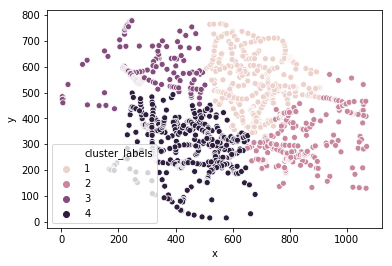

In [41]:
# bez normalizacji
Z = linkage(df_mouse, method='ward')
df_mouse['cluster_labels'] = fcluster(Z, 4, criterion='maxclust')  

sns.scatterplot(x = 'x', y = 'y', data=df_mouse, hue='cluster_labels')
plt.show()

In [42]:
# normalizujemy dane i dodajemy do df_mouse
df_mouse = pd.DataFrame(mouse)
df_mouse['x_scaled'] = whiten(df_mouse['x'])
df_mouse['y_scaled'] = whiten(df_mouse['y'])

df_mouse.head()

x    y  x_scaled  y_scaled
0  1068  129  4.857859  0.812852
1  1044  131  4.748694  0.825454
2  1022  133  4.648625  0.838057
3   941  175  4.280192  1.102706
4   894  207  4.066410  1.304344

In [43]:
# używamy metody kmeans

cluster_centers, distortion = kmeans(df_mouse[['x_scaled', 'y_scaled']], 3)
df_mouse['cluster_labels'], distortion_list = vq(df_mouse[["x_scaled", "y_scaled"]], cluster_centers)

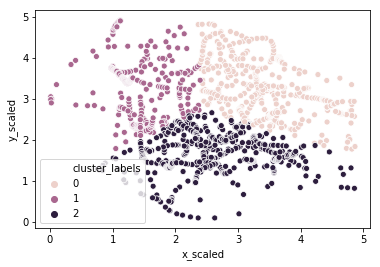

In [44]:
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = df_mouse)

In [45]:
distortion

0.7995050659369576

In [46]:
cluster_centers   # centroidy

array([[3.41232746, 3.2996037 ],
       [1.41753672, 3.21378188],
       [2.59558573, 1.65722206]])

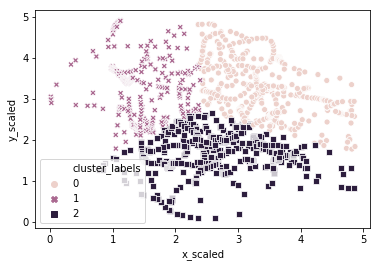

In [47]:
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = df_mouse, style='cluster_labels', )

In [48]:
# kmeans szuka defaultowo metodą centroidu (odpowiada za to tresh)

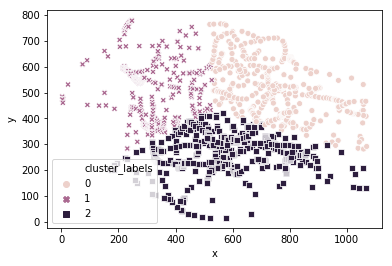

In [49]:
sns.scatterplot(x='x', y='y', hue='cluster_labels', data = df_mouse, style='cluster_labels', )
# oryginalne dane bez skalowania

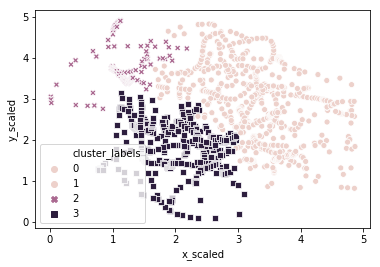

In [50]:
#  metoda linkage - ward

random.seed(6)

df_mouse = pd.DataFrame(mouse)
df_mouse['x_scaled'] = whiten(df_mouse['x'])
df_mouse['y_scaled'] = whiten(df_mouse['y'])

distance_matrix = linkage(df_mouse[['x_scaled', 'y_scaled']], method='ward')
df_mouse['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = df_mouse, style='cluster_labels')
plt.show()

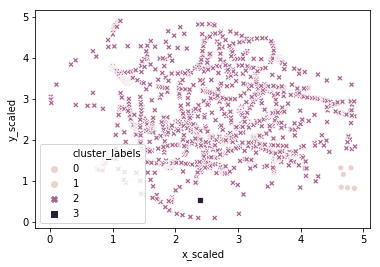

In [51]:
# metoda linkage - single (kiepski wynik)
random.seed(6)

df_mouse = pd.DataFrame(mouse)
df_mouse['x_scaled'] = whiten(df_mouse['x'])
df_mouse['y_scaled'] = whiten(df_mouse['y'])

distance_matrix = linkage(df_mouse[['x_scaled', 'y_scaled']], method='single')
df_mouse['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = df_mouse, style='cluster_labels')
plt.show()

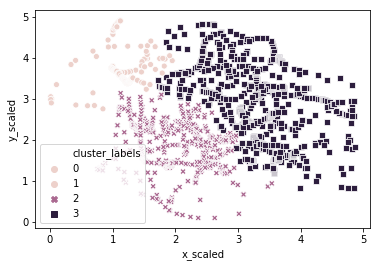

In [52]:
# metoda linkage - centroid
random.seed(6)

df_mouse = pd.DataFrame(mouse)
df_mouse['x_scaled'] = whiten(df_mouse['x'])
df_mouse['y_scaled'] = whiten(df_mouse['y'])

distance_matrix = linkage(df_mouse[['x_scaled', 'y_scaled']], method='centroid')
df_mouse['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = df_mouse, style='cluster_labels')
plt.show()

# Analiza obrazu - znajdowanie koloru dominującego

In [112]:
import matplotlib.image as img

In [113]:
poster = img.imread("plaza.jpg")
poster[0:3] # wektory zwracaja wspolrzedne RGB

array([[[  0, 105, 207],
        [  1, 104, 207],
        [  1, 102, 206],
        ...,
        [ 63, 155, 238],
        [ 64, 155, 238],
        [ 66, 155, 239]],

       [[  0, 102, 212],
        [  0, 101, 215],
        [  2, 103, 217],
        ...,
        [ 61, 156, 238],
        [ 63, 155, 238],
        [ 64, 155, 238]],

       [[ 18, 115, 212],
        [ 10, 108, 209],
        [  1, 102, 206],
        ...,
        [ 63, 155, 240],
        [ 63, 155, 240],
        [ 64, 154, 240]]], dtype=uint8)

In [55]:
len(poster)

340

In [114]:
r = []
g = []
b = []

for row in poster:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [115]:
d = sum(r), sum(g), sum(b)
d

(21743055, 30118040, 35599783)

In [116]:
# chcemy wyznaczyc ile jest dominujacych kolorow - najpierw chcemy zamienic poster na dataframe

import numpy as np

np_r = np.array(r)
np_g = np.array(g)
np_b = np.array(b)

df_poster = pd.DataFrame({'r' : np_r, 'g' : np_g, 'b' : np_b})
df_poster.head()


r    g    b
0  0  105  207
1  1  104  207
2  1  102  206
3  3  100  203
4  4  100  202

In [117]:
df_poster['scaled_r'] = whiten(df_poster['r'])
df_poster['scaled_g'] = whiten(df_poster['g'])
df_poster['scaled_b'] = whiten(df_poster['b'])

In [124]:
# tworzymy liste i zmienne
distortions = []
num_clusters = range(1, 8)   
# bedziemy tworzyc centra dla od 1 do 7 klastrow, i bedzie numerem klastra (a kazdy kmeans liczony 20 razy) 
# mozna sprawdzic wiecej np. range (1,15)

for i in num_clusters:
    cluster_centers, distortion = kmeans(df_poster[['scaled_r', 'scaled_g', 'scaled_b']], i)
    distortions.append(distortion)
    
    
# chcemy ustalic jaka jest dobra liczba centroidów - "metoda łokcia" -dodajemy po policzeniu kolorow
elbow_plot = pd.DataFrame({'num_clusters' : num_clusters, 'distortions' : distortions})


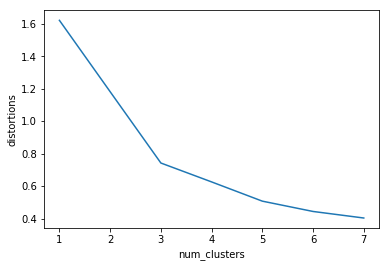

In [125]:
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)

In [126]:
# dostorsions ozn. odleglosc punktow od sredniej, czyli im wiecej centrow, tym mniejsze odleglosci, im bedzie
# wiecej centrow tym linia bedzie sie robic bardziej prosta, jesli odleglosci maleja juz nieznaczaco to nie ma
# sensu dokladac kolejnych klastrow
# 1. szukac pierwszego załamania oraz
# 2. miejsca po którym linia robi się w miare płaska

In [119]:
distortions

[1.6218187116518727,
 1.1807970107294474,
 0.7428458299800956,
 0.6245220365764035,
 0.5071205128749677,
 0.44345956861320224,
 0.4031478453866148]

In [120]:
cluster_centers   #mamy 7 wektorow

array([[2.82250813, 3.9917575 , 2.68383577],
       [0.05758253, 2.31173384, 2.78895469],
       [0.69533304, 0.71015449, 0.26284172],
       [0.88511912, 2.95536294, 2.97381561],
       [1.45318854, 1.71004229, 0.8623293 ],
       [2.17253515, 2.64392024, 1.49497606],
       [1.89306944, 3.55941645, 3.00181101]])

In [121]:
# chcemy policzyc odchylenie standarowe od RGB
r_std, g_std, b_std = df_poster[['r', 'g', 'b']].std()

In [122]:
print(r_std, g_std, b_std)

81.46015633144751 55.214008749158864 77.36716150044548


In [123]:
colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

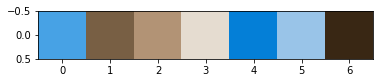

In [66]:
plt.imshow([colors])
# tyle kolorow ile ustawilismy centroidow, czyli 7

<img src = 'plaza.jpg'>

In [111]:
# dla obrazkow png
# from PIL import Image
# import numpy as np
# poster = np.asarray(Image.open("house.png"))


# Chcemy znaleźć dominujący kolor dla każdego z 8 serwisów, a następnie dominujący z tych 8

In [150]:
import matplotlib.image as img
import pandas as pd
from scipy.cluster.vq import kmeans, vq

def read_image(img_name):
    return img.imread(img_name)

def separate_colors(image):
    r = []
    g = []
    b = []

    for row in image:
        for temp_r, temp_g, temp_b in row:
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)
          

    return r, g, b

def get_most_popular_color(tp_colors_rgb):
    r, g, b = tp_colors_rgb
    return sum(r), sum(g), sum(b), max(sum(r), sum(g), sum(b))


def serialize_data(tp_colors_rgb):
    r, g, b = tp_colors_rgb
    np_r = np.array(r)
    np_g = np.array(g)
    np_b = np.array(b)

    df_image = pd.DataFrame({"r": np_r, "g": np_g, "b": np_b})
    df_image["scaled_r"] = whiten(df_image["r"])
    df_image["scaled_g"] = whiten(df_image["g"])
    df_image["scaled_b"] = whiten(df_image["b"])

    return df_image

    

def calculate_clusters(max_range, df_image):
    distorsions = []
    num_clusters = range(1, max_range)
    for i in num_clusters:
        cluster_centers, distortion = kmeans(df_image[["scaled_r", "scaled_g", "scaled_b"]], i)
        distorsions.append(distortion)

    return distorsions, num_clusters, cluster_centers


def generate_elbow_plot(num_clusters, distorsions):
    elbow_plot = pd.DataFrame({"num_clusters": num_clusters, "distorsions": distorsions})
    sns.lineplot(x="num_clusters", y="distorsions", data=elbow_plot)
    plt.show()

def calculate_and_show_dominant_colors(df_image, cluster_centers):
    r_std, g_std, b_std = df_image[["r", "g", "b"]].std()
    colors = []
  
    for cluster_center in cluster_centers:
        scaled_r, scaled_g, scaled_b = cluster_center
        colors.append((
            scaled_r * r_std / 255,
            scaled_g * g_std / 255,
            scaled_b * b_std / 255
        ))

    plt.imshow([colors])
    plt.show()

In [132]:
screen_shots = ['facebook.jpg', 'twitter.jpg', 'onet.jpg']
#                 'yahoo.jpg', 'reddit.jpg', 'amazon.jpg', 'alibaba.jpg', 'wykop.jpg']

In [133]:
image = read_image('facebook.jpg')
r_g_b = separate_colors(image)
get_most_popular_color(r_g_b)

(286607979, 281873011, 284134761)

In [135]:
serialize_data(r_g_b).head()

r    g    b  scaled_r  scaled_g  scaled_b
0  193  210  238   3.33008  3.535591  3.816432
1  193  210  238   3.33008  3.535591  3.816432
2  193  210  238   3.33008  3.535591  3.816432
3  193  210  238   3.33008  3.535591  3.816432
4  193  210  238   3.33008  3.535591  3.816432

In [136]:
df_image = serialize_data(r_g_b)

In [137]:
calculate_clusters(5, df_image)

([1.3506736250554463,
  0.5033831127689188,
  0.4213202438019081,
  0.3200703245353783],
 range(1, 5),
 array([[4.02119558, 3.93438684, 3.79989269],
        [4.3763423 , 4.27723292, 4.07345091],
        [1.434131  , 1.41257432, 1.49798403],
        [3.38596683, 2.64182435, 2.26857816]]))

In [140]:
distorsions, num_clusters, cluster_centers = calculate_clusters(5, df_image)

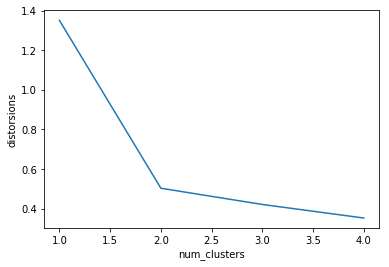

In [141]:
generate_elbow_plot(num_clusters, distorsions)

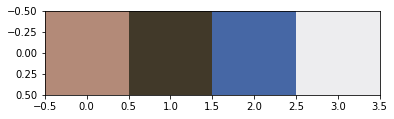

In [142]:
calculate_and_show_dominant_colors(df_image, cluster_centers)

In [153]:
# Spośród wyników chcemy znaleźć najpopularniejszy kolor
def show_fancy_headline(title):
    d = "*" * len(title) + "\n"
    d += title + "\n"
    d += "*" * len(title) + "\n"
    print(d)

************
facebook.jpg
************

(286607979, 281873011, 284134761, 286607979)


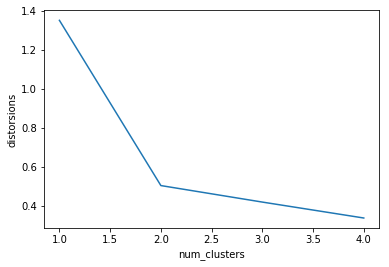

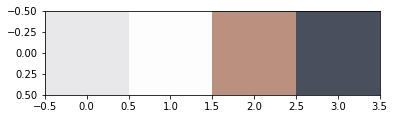

***********
twitter.jpg
***********

(37569956, 44594276, 45679825, 45679825)


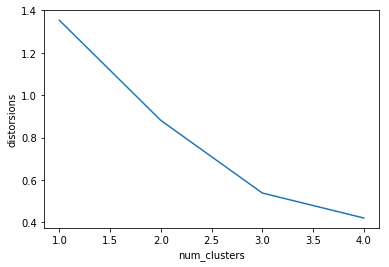

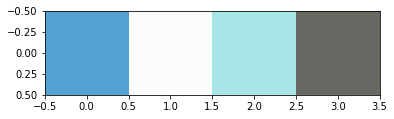

********
onet.jpg
********

(326328956, 320271478, 316881622, 326328956)


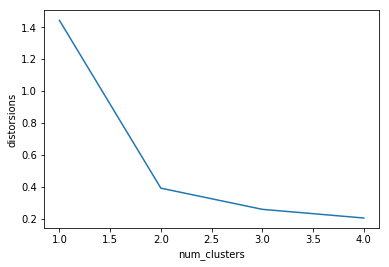

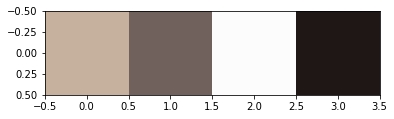

*********
yahoo.jpg
*********

(334015732, 331759126, 326968298, 334015732)


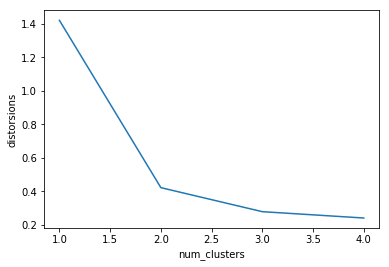

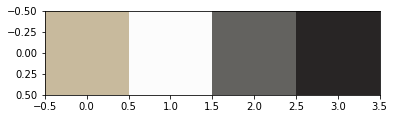

**********
reddit.jpg
**********

(323267497, 323614714, 327551868, 327551868)


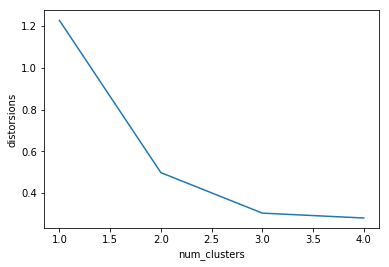

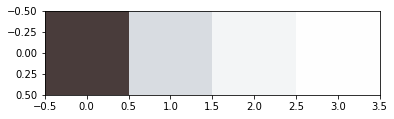

**********
amazon.jpg
**********

(336337584, 335889314, 339059659, 339059659)


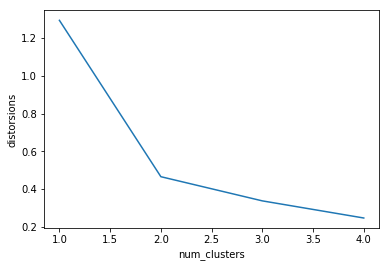

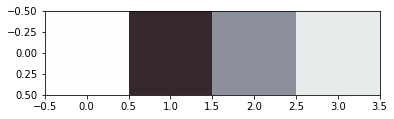

***********
alibaba.jpg
***********

(349140320, 346284657, 347655911, 349140320)


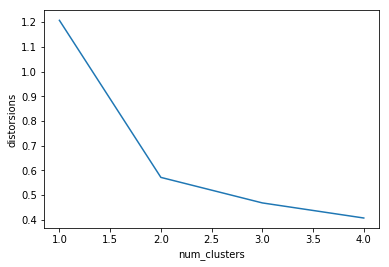

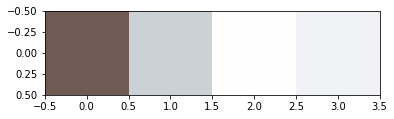

*********
wykop.jpg
*********

(326531006, 335534059, 340040541, 340040541)


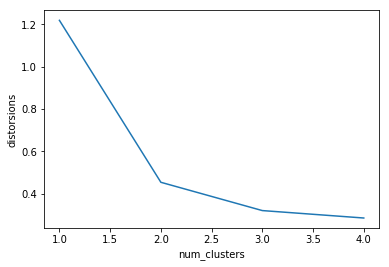

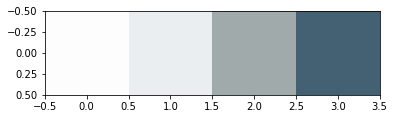

In [155]:
screen_shots = ['facebook.jpg', 'twitter.jpg', 'onet.jpg', 'yahoo.jpg', 'reddit.jpg', 'amazon.jpg', 'alibaba.jpg', 'wykop.jpg']

for screenshot in screen_shots:
    show_fancy_headline(screenshot)
    image = read_image(screenshot)
    
    image_separate = separate_colors(image)  # zwraca tuple
    
    most_popular_color = get_most_popular_color(image_separate)
    print(most_popular_color)
    
    df_image = serialize_data(image_separate)
    distorsions, num_clusters, cluster_centers = calculate_clusters(5, df_image)  # rozpakowanie tupli
    
    generate_elbow_plot(num_clusters, distorsions)
    
    calculate_and_show_dominant_colors(df_image, cluster_centers)
    

In [ ]:
# def get_most_popular_color2(tp_colors_rgb):
#     r, g, b = tp_colors_rgb
#     d = [{'r_sum' : sum(r)}, {'g_sum' : sum(g)}, {'b_sum' : sum(b)}]
#     max_d = max(sum(r), sum(g), sum(b))
    
#     return d.filter(lambda e: )

In [156]:
def rather_simple_function_which_finds_max_value_from_provided_as_argument_list_of_key_value_pairs_also_known_as_dicts_and_has_funny_name(list_of_dicts):

    """

    >>> rather_simple_function_which_finds_max_value_from_provided_as_argument_list_of_key_value_pairs_also_known_as_dicts_and_has_funny_name([{"red": 1}, {"green": 2}, {"blue": 3}])

    {'blue': 3}

    >>> rather_simple_function_which_finds_max_value_from_provided_as_argument_list_of_key_value_pairs_also_known_as_dicts_and_has_funny_name([{"red": 843797493492384}, {"green": 938420938420394}, {"blue": 3494823049820394}])

    {'blue': 3494823049820394}

    """

    max_dict = {}
    max_dict_value = -1

    for single_dict in list_of_dicts:
        for key, value in single_dict.items():
            if value > max_dict_value:
                max_dict_value = value
                max_dict = single_dict

    return max_dict

# Generatory

In [68]:
def gen123():
    yield 1
    yield 2
    yield 3

In [69]:
# instancjonujemy generator
g = gen123()
type(g)

generator

In [70]:
# funkcja next wyciąga z generator dane, działa podobnie jak return, czyli zwraca wartość i jest zamrażany
next(g)

1

In [71]:
next(g)

2

In [72]:
next(g)

3

In [73]:
# nie ma nic więcej w generatorze więc leci błąd stop iteration
next(g) 

StopIteration: 

In [75]:
# jak automatycznie obsłużyć stop iteration
for e in gen123():
    print(e)

1
2
3


In [76]:
# tworzymy jeszcze raz generator
def gen123():
    print('1a')
    yield 1
    print('2a')
    yield 2
    print('3a')

In [77]:
g = gen123()
next(g)  # wykona się cały kod aż do yield 1

1a


1

In [78]:
next(g) # wykona siecały kod aż do yield 2

2a


2

In [79]:
next(g)

3a


StopIteration: 

In [80]:
# nieskonczony generator
def infinite():
    i = 0
    while True:
        yield i     # w takiej kolejnosci bo protokol wymaga trzymac reference do nastepnego elementu, anie biezacego
        i += 1

In [81]:
g = infinite()
next(g)

0

In [82]:
next(g)

1

In [83]:
next(g)

2

In [84]:
g2 = infinite() # nowa instancja generatora, dlatego iteracja ponownie od zera
next(g2)

0

In [86]:
def infinite2():
    i = 0
    while True:
        yield i
        i += 1
        if i > 5:
            return 'xxxxx'

In [87]:
g = infinite2()
next(g)

0

In [88]:
next(g)

1

In [89]:
next(g)

2

In [90]:
next(g)

3

In [91]:
next(g)

4

In [92]:
next(g)

5

In [93]:
next(g)

StopIteration: xxxxx

# Reactive programming

Oznacza ze w naszym programie reagujemy na to co się dzieje np. aż przyjdzie jakis event, użytkownik coś zrobi, itp
https://github.com/ReactiveX/RxPY

In [95]:
# jak policzyc pierwiastek z miliona liczb po kolei -> petla range i pierwiaster. ale my chcemy je miec, a nie liczyc
from math import sqrt
milion_sqrt = (sqrt(x) for x in range(1000000))   # tak by wygladalo wygenerowanie miliona liczb

In [96]:
milion_sqrt

<generator object <genexpr> at 0x7fccf3808048>

In [97]:
list(milion_sqrt)

[0.0,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0,
 3.1622776601683795,
 3.3166247903554,
 3.4641016151377544,
 3.605551275463989,
 3.7416573867739413,
 3.872983346207417,
 4.0,
 4.123105625617661,
 4.242640687119285,
 4.358898943540674,
 4.47213595499958,
 4.58257569495584,
 4.69041575982343,
 4.795831523312719,
 4.898979485566356,
 5.0,
 5.0990195135927845,
 5.196152422706632,
 5.291502622129181,
 5.385164807134504,
 5.477225575051661,
 5.5677643628300215,
 5.656854249492381,
 5.744562646538029,
 5.830951894845301,
 5.916079783099616,
 6.0,
 6.082762530298219,
 6.164414002968976,
 6.244997998398398,
 6.324555320336759,
 6.4031242374328485,
 6.48074069840786,
 6.557438524302,
 6.6332495807108,
 6.708203932499369,
 6.782329983125268,
 6.855654600401044,
 6.928203230275509,
 7.0,
 7.0710678118654755,
 7.14142842854285,
 7.211102550927978,
 7.280109889280518,
 7.3484692283495345,
 7.4161984870

In [98]:
milion_e = (x**x for x in range(1000000))

In [99]:
# a = list(milion_e) - nie liczyc, bo za duzo obliczen

KeyboardInterrupt: 

In [109]:
d = (x**2 for x in range(100))
d

<generator object <genexpr> at 0x7fccf38085e8>

In [110]:
a = list(d)
a[10:15]

[100, 121, 144, 169, 196]